<h1> Matsubara fitting for data with continuous spectrum (semicircular density) </h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matsubara import hybfit
import scipy
beta = 20
N = 55
Z = 1j *(np.linspace(-N, N, N + 1)) * np.pi / beta

Now we construct the Matsubara data with semicircular density:

In [2]:
def Kw(w, v):
    return 1 / ( v - w)
def semicircular(x):
    return 2 * np.sqrt(1 - x**2) / np.pi
def make_G_with_cont_spec( Z, rho, a=-1.0, b=1.0, eps=1e-12):
    G = np.zeros((Z.shape[0]), dtype=np.complex128)
    for n in range(len(Z)):
        def f(w):
            return Kw(w , Z[n]) * rho(w)

        # f = lambda w: Kw(w-en[i],Z[n])*rho(w)
        G[n] = scipy.integrate.quad(
            f, a, b, epsabs=eps, epsrel=eps, complex_func=True
        )[0]
        

    return G



Below we show that by increasing number of modes $N_p$ (and as a result the number of bath orbitals increases), the fitting error decreases. We are demonstrating this using a matrix-valued Matsubara data:

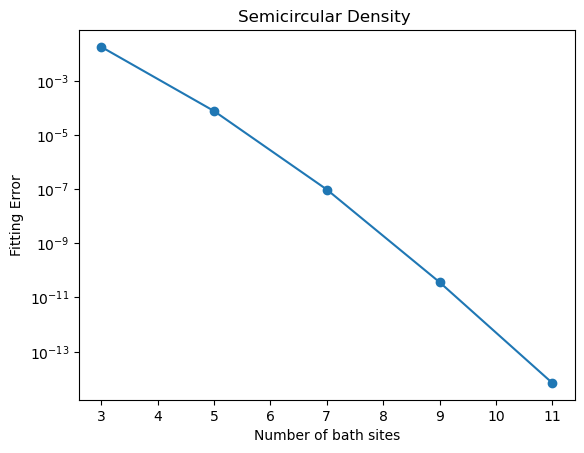

In [3]:
Delta = make_G_with_cont_spec( Z, semicircular)
error = []
Nbath = []
for Np in range(2, 12, 2):
    bathenergy, bathhyb, final_error, func = hybfit(Delta, Z, Np = Np, verbose=False)
    Nbath.append(len(bathenergy))
    error.append(final_error)
plt.yscale('log')
plt.plot(Nbath, error, 'o-')
plt.xlabel('Number of bath sites')
plt.ylabel('Fitting Error')
plt.title("Semicircular Density ")
plt.show()
    